# CREDIT CARD FRAUD DETECTION

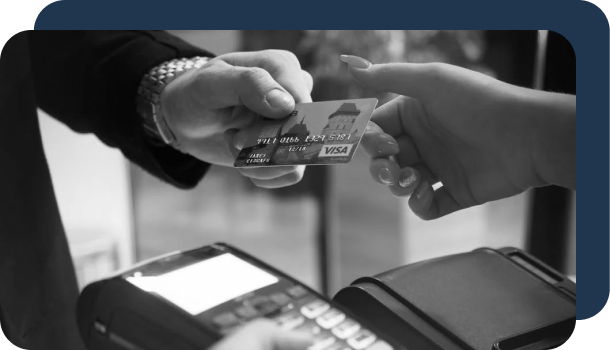

## **ABOUT THE AUTHOR**

Hi there! I'm Akshay Shekade, a data scientist in training. I'm diving into the world of data science and exploring various concepts and techniques to enhance my skills. Join me on this exciting journey as we learn and grow in the field of data science together. 

> "Community is the heart of growth and learning. Together, we can achieve more than we ever could alone."

| Name               | Email                                               | LinkedIn                                                  | GitHub                                           | Kaggle                                      |
|--------------------|-----------------------------------------------------|-----------------------------------------------------------|--------------------------------------------------|-----------------------------------------------|
| **Akshay Shekade**      |akshayshekade757@gmail.com  | [![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-%23000000.svg?style=for-the-badge&logo=LinkedIn&logoColor=white)](https://www.linkedin.com/in/akshay-shekade-a225a8135/)  | [![GitHub Badge](https://img.shields.io/badge/GitHub-%23000000.svg?style=for-the-badge&logo=GitHub&logoColor=white)](https://github.com/AkshayShekade)  | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-%23000000.svg?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/akshayshekade)  |

> **LETS BEGIN** :)

## OBJECTIVE

- **Build a machine learning model to identify fraudulent credit card transactions.**
- **Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.**
- **Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.**
- **Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.**

**IMPORTING ALL NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**DISPLAY MAXIMUM COLUMNS**

In [2]:
pd.options.display.max_columns = None

**IMPORTING A DATASET**

In [3]:
df =pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 31
Number of rows: 284807


**INFORMATION ABOUT A DATASET**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**CHECKING MISSING VALUES**

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
df = df.drop(['Time'], axis =1)

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


**CHECKING DUPLICATE VALUES**

In [13]:
df.duplicated().sum()

9144

**DROPPING DUPLICATE VALUES**

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(275663, 30)

In [16]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [17]:
X = df.drop('Class', axis = 1)
y=df['Class']

### MODEL TRAINING AND EVALUATION

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    #"K-Nearest Neighbors Classifier": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "Stochastic Gradient Descent Classifier": SGDClassifier(),
    "Voting Classifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC())], voting='hard')}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print(f" Recall: {recall}")
    print(f" F1 Score: {f1}")
    
    # Confusion Matrix
    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Classification Report
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))



==========Logistic Regression===========

 Accuracy: 0.9992563437505668
 Precision: 0.890625
 Recall: 0.6263736263736264
 F1 Score: 0.7354838709677419

 Confusion Matrix:
[[55035     7]
 [   34    57]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.89      0.63      0.74        91

    accuracy                           1.00     55133
   macro avg       0.95      0.81      0.87     55133
weighted avg       1.00      1.00      1.00     55133


==========Decision Tree Classifier===========

 Accuracy: 0.9988391707325921
 Precision: 0.6261682242990654
 Recall: 0.7362637362637363
 F1 Score: 0.6767676767676768

 Confusion Matrix:
[[55002    40]
 [   24    67]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.63      0.74      0.68        91

    accuracy                          

### UNDERSAMPLING

In [22]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [23]:
normal.shape

(275190, 30)

In [24]:
fraud.shape

(473, 30)

In [25]:
normal_sample = normal.sample(n=473)

In [26]:
normal_sample.shape

(473, 30)

In [27]:
new_data = pd.concat([normal_sample,fraud], ignore_index=True)

In [28]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.898963,-0.731097,-0.680585,-1.519772,-0.148221,-0.711202,0.550788,-0.219035,0.531421,-1.009431,1.757948,1.720479,0.626156,0.695468,0.944537,-0.766002,-0.119680,-0.580322,0.995486,0.354857,-0.150197,-0.790877,-0.139637,-0.260853,0.371209,-0.282059,-0.048331,0.028264,0.480372,0
1,1.904380,-0.724922,-0.529027,0.402387,-0.675029,-0.079280,-0.722558,0.103213,1.444527,0.010990,-1.389421,-0.392516,-1.003566,-0.034057,0.545659,0.467412,-0.508782,0.255828,-0.188288,-0.120564,0.161716,0.468754,0.141020,0.603069,-0.296680,0.543186,-0.042701,-0.034677,-0.093394,0
2,0.703067,-1.815739,0.496574,-0.542776,-1.660714,-0.111971,-0.709362,0.033528,-0.624321,0.630513,1.036117,-0.215780,0.013610,-0.129122,0.515895,1.830191,-0.284158,-0.142667,0.530033,0.776982,0.612154,0.905217,-0.448668,0.054635,0.305473,-0.081090,-0.032494,0.070296,1.042103,0
3,1.990280,-0.194137,-1.304569,0.412127,-0.185166,-1.341006,0.217684,-0.363987,0.727934,0.011458,-0.801499,-0.039729,-0.558404,0.595036,0.849743,-0.146666,-0.479693,0.061828,-0.267127,-0.202643,0.277412,0.847148,-0.027243,0.069097,0.215937,-0.106615,-0.028069,-0.051681,-0.184030,0
4,1.295951,0.330418,0.331268,0.491593,-0.122202,-0.677017,0.139594,-0.247490,-0.117319,-0.103182,-0.440067,0.895020,1.699934,-0.048767,0.925927,0.387220,-0.678233,-0.538985,0.059998,0.006394,-0.275160,-0.729979,0.059159,-0.084392,0.327771,0.121121,-0.021262,0.016787,-0.345313,0


In [29]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [30]:
X = new_data.drop('Class', axis = 1)
y= new_data['Class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuaracy: 0.9526315789473684

 Precision: 1.0

 Recall: 0.9117647058823529

 F1 Score: 0.9538461538461539

==========Decision Tree Classifier===========

 Accuaracy: 0.9263157894736842

 Precision: 0.9489795918367347

 Recall: 0.9117647058823529

 F1 Score: 0.93


### OVERSAMPLING

In [33]:
X = df.drop('Class', axis = 1)
y= df['Class']

In [34]:
X.shape

(275663, 29)

In [35]:
y.shape

(275663,)

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [38]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [40]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuaracy: 0.9453831897961409

 Precision: 0.9730596164616365

 Recall: 0.9160591240477792

 F1 Score: 0.943699430626311

==========Decision Tree Classifier===========

 Accuaracy: 0.9981376503506668

 Precision: 0.9974400871459695

 Recall: 0.9988364271039761

 F1 Score: 0.9981377687744701


In [41]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res, y_res)

DecisionTreeClassifier()

In [42]:
import joblib

In [43]:
joblib.dump(dtc, "credit_card_model.pkl")

['credit_card_model.pkl']

In [44]:
model = joblib.load("credit_card_model.pkl")

In [48]:
pred = model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,
                       1.37815522427443,-0.338320769942518,0.462387777762292,
                       0.239598554061257,0.0986979012610507,0.363786969611213
                       ,0.0907941719789316,-0.551599533260813,-0.617800855762348,
                       -0.991389847235408,-0.311169353699879,1.46817697209427,
                       -0.470400525259478,0.207971241929242,0.0257905801985591,
                       0.403992960255733,0.251412098239705,-0.018306777944153,
                       0.277837575558899,-0.110473910188767,0.0669280749146731,
                       0.128539358273528,-0.189114843888824,0.133558376740387,
                       -0.0210530534538215,149.62]])

In [49]:
pred[0]

0

In [50]:
if pred[0] == 0:
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Normal Transcation


- **Thank you so much for taking the time to explore this notebook with me. Your support means the world to me, and I couldn't have come this far without it. As I continue my journey in data science and machine learning, I humbly ask for your continued support and encouragement. Together, we can make a difference in the world of data science and beyond. 🚀💫**